In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Data-Science-Specialization/main/Week%20-12/IMDB%20-%20One%20Hot%20Encoding%20Genre/imdb.csv')
series = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Data-Science-Specialization/main/Week%20-12/IMDB%20-%20Most%20Popular%20Movie%20%26%20Series/Shows.csv')

In [3]:
movies.head(2)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [4]:
series.head(2)

,Unnamed: 0,ID,Name,Year,Rating,Duration,Reviews,Director,Genre,Link
0,0,tt5491994,Planet Earth II,2016,9.5,4h 58m,139,David Attenborough|Chadden Hunter|Elizabeth White,Documentary,https://www.imdb.com/title/tt5491994/
1,1,tt0795176,Planet Earth,2006,9.4,8h 58m,100,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary,https://www.imdb.com/title/tt0795176/


### 1.1) removing unneccesary column 

In [5]:
del movies['Poster_Link']
del movies['Certificate']
del movies['Overview']
del movies['Meta_score']
del movies['Star1']
del movies['Star2']
del movies['Star3']
del movies['Star4']
del movies['No_of_Votes']
del movies['Gross']


del series['Unnamed: 0']
del series['ID']
del series['Reviews']
del series['Link']



In [6]:
movies.head(2)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola


In [7]:
series.head(2)

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,4h 58m,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,2006,9.4,8h 58m,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary


### 1.2) checking the null values 

In [8]:
movies.isna().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Director         0
dtype: int64

In [9]:
series.isnull().sum()

Name        0
Year        0
Rating      0
Duration    0
Director    0
Genre       0
dtype: int64

# preprocessing the duration column in series

In [11]:
duration = []
for i in series['Duration']:
    if ('h' in i and 'm' in i):
        duration.append(int(i.split(' ')[0][:-1])*60 + int(i.split(' ')[1][:-1]))
    elif ('h' in i and 'm' not in i):
        duration.append(int(i.split(' ')[0][:-1])*60)
    elif ('h'not in i and 'm' in i ):
        duration.append(i[:-1])
    else:
        duration.append(55)
series['Duration'] = duration
series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,2006,9.4,538,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary
2,Breaking Bad,2008,9.4,49,Bryan Cranston|Aaron Paul|Anna Gunn,Crime|Drama|Thriller
3,Band of Brothers,2001,9.4,594,Scott Grimes|Damian Lewis|Ron Livingston,Drama|History|War
4,Chernobyl,2019,9.3,330,Jessie Buckley|Jared Harris|Stellan Skarsgård,Drama|History|Thriller


# preprocessing the duration column in movies

In [13]:
duration = []
for i in movies['Runtime']:
    duration.append(i.split(' ')[0])
movies['Runtime'] = duration 
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont
1,The Godfather,1972,175,"Crime, Drama",9.2,Francis Ford Coppola
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,Christopher Nolan
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,Francis Ford Coppola
4,12 Angry Men,1957,96,"Crime, Drama",9.0,Sidney Lumet


### preprocessing director column for series

In [84]:
movies['Director'].unique()

array(['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan',
       'Sidney Lumet', 'Peter Jackson', 'Quentin Tarantino',
       'Steven Spielberg', 'David Fincher', 'Robert Zemeckis',
       'Sergio Leone', 'Lana Wachowski', 'Martin Scorsese',
       'Irvin Kershner', 'Milos Forman', 'Thomas Kail', 'Bong Joon Ho',
       'Sudha Kongara', 'Fernando Meirelles', 'Hayao Miyazaki',
       'Roberto Benigni', 'Jonathan Demme', 'George Lucas',
       'Masaki Kobayashi', 'Akira Kurosawa', 'Frank Capra',
       'Todd Phillips', 'Damien Chazelle', 'Olivier Nakache',
       'Roman Polanski', 'Ridley Scott', 'Tony Kaye', 'Bryan Singer',
       'Luc Besson', 'Roger Allers', 'James Cameron',
       'Giuseppe Tornatore', 'Isao Takahata', 'Alfred Hitchcock',
       'Michael Curtiz', 'Charles Chaplin', 'Nadine Labaki', 'Can Ulkay',
       'Gayatri', 'Makoto Shinkai', 'Nitesh Tiwari', 'Bob Persichetti',
       'Anthony Russo', 'Lee Unkrich', 'Rajkumar Hirani', 'Aamir Khan',
       'Andrew Stant

In [85]:
director = [] 
for i in series['Director']:
    director.append(i.replace('|',','))
    
series['Director'] = director
series.head(5)

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,"David Attenborough,Chadden Hunter,Elizabeth White",Documentary
1,Planet Earth,2006,9.4,538,"David Attenborough,Sigourney Weaver,Nikolay Dr...",Documentary
2,Breaking Bad,2008,9.4,49,"Bryan Cranston,Aaron Paul,Anna Gunn",Crime|Drama|Thriller
3,Band of Brothers,2001,9.4,594,"Scott Grimes,Damian Lewis,Ron Livingston",Drama|History|War
4,Chernobyl,2019,9.3,330,"Jessie Buckley,Jared Harris,Stellan Skarsgård",Drama|History|Thriller


# preprocessing genre column for movies 

In [114]:
genre = []
for i in movies['Genre']:
    genre.append(",".join([_.strip() for _ in i.split(',')]))
movies['Genre'] = genre
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont
1,The Godfather,1972,175,CrimeDrama,9.2,Francis Ford Coppola
2,The Dark Knight,2008,152,ActionCrimeDrama,9.0,Christopher Nolan
3,The Godfather: Part II,1974,202,CrimeDrama,9.0,Francis Ford Coppola
4,12 Angry Men,1957,96,CrimeDrama,9.0,Sidney Lumet


# preprocessing genre column for series 

In [14]:
genre =[i.replace('|',',') for i in series['Genre']]
series['Genre'] = genre
series.head()

,Name,Year,Rating,Duration,Director,Genre
0,Planet Earth II,2016,9.5,298,David Attenborough|Chadden Hunter|Elizabeth White,Documentary
1,Planet Earth,2006,9.4,538,David Attenborough|Sigourney Weaver|Nikolay Dr...,Documentary
2,Breaking Bad,2008,9.4,49,Bryan Cranston|Aaron Paul|Anna Gunn,"Crime,Drama,Thriller"
3,Band of Brothers,2001,9.4,594,Scott Grimes|Damian Lewis|Ron Livingston,"Drama,History,War"
4,Chernobyl,2019,9.3,330,Jessie Buckley|Jared Harris|Stellan Skarsgård,"Drama,History,Thriller"


# combining the dataset 

In [18]:
data = []

for i in movies.values:
    data.append([i[0],i[1],i[2],i[3],i[4],i[5],'Movie'])
    
for i in series.values:
    data.append([i[0],i[1],i[3],i[5],i[2],i[4],'Series'])
df = pd.DataFrame(data,columns = ['name','year','duration','genre','rating','director','type'])
df.head()

,name,year,duration,genre,rating,director,type
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Movie
1,The Godfather,1972,175,"Crime, Drama",9.2,Francis Ford Coppola,Movie
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,Christopher Nolan,Movie
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,Francis Ford Coppola,Movie
4,12 Angry Men,1957,96,"Crime, Drama",9.0,Sidney Lumet,Movie


In [19]:
df.to_csv('Final.csv',index = False)

# Data analysis

# finding all the genre column 

In [28]:
genre =[] 
for i in df['genre']:
    genre += i.split(',')
genre = list(set(genre))
print(genre)

['Biography', ' History', ' Western', 'Nan', 'Music', 'Fantasy', 'Sci-Fi', 'Romance', 'Documentary', 'War', ' Mystery', 'Family', 'Crime', ' Film-Noir', ' Romance', 'Short', 'History', ' Sport', 'Musical', 'Sport', ' Family', 'Film-Noir', 'Game-Show', ' Drama', ' Sci-Fi', ' Music', 'Thriller', ' Action', ' Thriller', ' War', ' Crime', ' Comedy', ' Biography', 'Horror', 'Comedy', ' Fantasy', 'Talk-Show', 'Drama', 'Animation', 'News', 'Adventure', 'Mystery', 'Reality-TV', 'Action', ' Musical', ' Adventure', 'Western', ' Horror']


# count number of shows or movies in each genre 

In [30]:
data = []
for gen in genre :
    c = 0
    for i in df['genre']:
        if gen in (i):
            c += 1
    data.append([gen,c])
df_ = pd.DataFrame(data,columns =['Genre','Freq'])
df_.head()
        

,Genre,Freq
0,Biography,121
1,History,56
2,Western,16
3,Nan,24
4,Music,52


# top 5 genre in terms of number of shows/movies


In [31]:
df_.sort_values(by='Freq',ascending=False).head(10)

,Genre,Freq
37,Drama,847
23,Drama,435
34,Comedy,304
12,Crime,261
43,Action,244
40,Adventure,242
26,Thriller,151
28,Thriller,136
7,Romance,135
38,Animation,130


# genre distribution (visualisation )

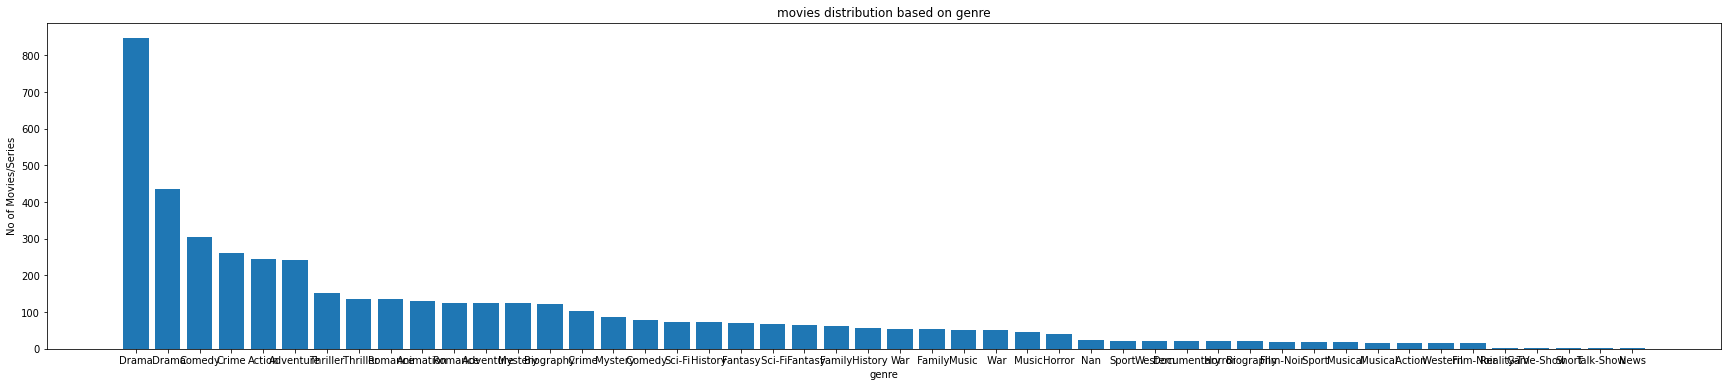

In [35]:
x = df_.sort_values(by ='Freq',ascending = False)['Genre'].values
y = df_.sort_values(by ='Freq',ascending = False)['Freq'].values

fig ,ax = plt.subplots(figsize =(30,6))

ax.bar(x,y)

plt.title('movies distribution based on genre')
plt.xlabel('genre')
plt.ylabel('No of Movies/Series')

plt.show()

# finding number of director by each director 

In [36]:
director = []
for i in df['director']:
    director += i.split(',')
director = list(set(director))

data = []
for j in director :
    c = 0
    for i in df['director']:
        if j in (i):
            c += 1
    data.append([j,c])
df_ = pd.DataFrame(data,columns =['director','Freq'])
df_.head()
        

,director,Freq
0,Naveen Kasturia|Arunabh Kumar|Jitendra Kumar,1
1,Abhishek Chaubey,1
2,David Mitchell|Robert Webb|Matt King,1
3,Majid Majidi,1
4,Marc Caro,1


# top 20 director with most number of series / number 

In [38]:
df_.sort_values(by = 'Freq',ascending = False).head(20)

,director,Freq
199,Alfred Hitchcock,15
110,Steven Spielberg,13
621,Hayao Miyazaki,11
528,Akira Kurosawa,10
774,Martin Scorsese,10
263,Stanley Kubrick,9
48,Woody Allen,9
586,Billy Wilder,9
143,Christopher Nolan,8
227,David Fincher,8


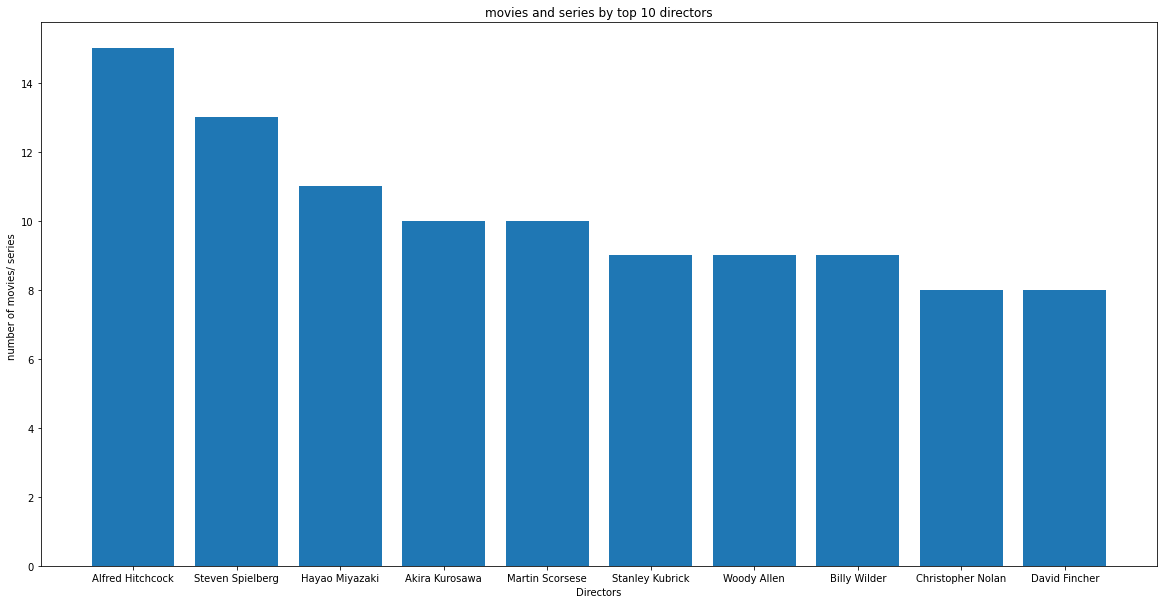

In [50]:
x = df_.sort_values(by = 'Freq',ascending = False)['director'].head(10).values
y = df_.sort_values(by = 'Freq',ascending = False)['Freq'].head(10).values
fig,ax = plt.subplots(figsize =(20,10))
ax.bar(x,y)
plt.title('movies and series by top 10 directors')
plt.xlabel('Directors')
plt.ylabel('number of movies/ series ')
plt.show()